In [25]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 200)

# sample from model test
n_model = 94 # 모델 응답 수
x_model = 65 # 긍정 응답 수
p_model = x_model/n_model # 모델 긍정 비율(p)
std_model = np.sqrt(p_model*(1-p_model)/n_model)
y_model = stats.norm.pdf(x, p_model, std_model)

# sample from popular test
n_popular = 56 # 인기도 응답 수
x_popular = 33 # 긍정 응답 수
p_popular = x_popular/n_popular # 인기도 긍정 비율(p)
std_popular = np.sqrt(p_popular*(1-p_popular)/n_popular)
y_popular = stats.norm.pdf(x, p_popular, std_popular)

### [두 집단의 비율 분포 그래프 비교]
- 각 집단의 표본 비율 정규 근사를 통해, 두 표본 비율의 분포를 비교

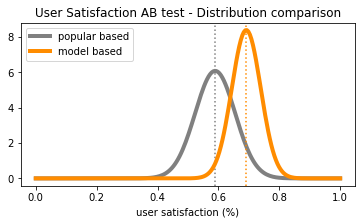

In [72]:
# 두 그룹간 분포 그래프 비교 (정규 근사로 정규 분포를 따른다고 가정)
plt.figure(figsize=(6, 3))
plt.plot(x, y_popular, label='popular based', color = 'grey', linewidth = "4")
plt.axvline(x=p_popular, color = 'grey', linestyle = ':')

plt.plot(x, y_model, label='model based', color = 'darkorange', linewidth = "4")
plt.axvline(x=p_model, color = 'darkorange', linestyle = ':')

plt.xlabel('user satisfaction (%)')
plt.legend(loc='best')
plt.title("User Satisfaction AB test - Distribution comparison")
plt.show()

### [두 집단의 모비율에 대한 차이 검정]
- 가설: $H_{0}:p_{popular} = p_{model} \space\space \text{vs} \space\space H_{1}:p_{popular} < p_{model}$  
- 표본 비율의 정규 근사를 활용하여, 정규 검정을 사용함
- 각 집단의 모비율의 분산은 알 수 없으므로, 모비율의 분산을 추정하는 방법을 사용함
    - [Method 1]독립 표본이라는 가정하에 각 표본 분산의 합 사용
    - [Method 2]두 표본을 함께 고려하여, 합동 표본 분산을 활용

In [64]:
# [Method 1] 일반적인 방법론 사용
std_estimator = np.sqrt(p_popular*(1-p_popular)/n_popular + p_model*(1-p_model)/n_model)
z_statistic = (p_popular - p_model)/std_estimator

print("p-value:", stats.norm.cdf(z_statistic))

p-value: 0.10404068136929251


In [65]:
# [Method 2] 합동표본분산 사용
p_pooled = (x_popular + x_model)/(n_popular + n_model)
std_pooled =  np.sqrt(p_pooled*(1-p_pooled)/n_popular + p_pooled*(1-p_pooled)/n_model)
z_statistic_pooled = (p_popular - p_model)/std_pooled

print("p-value:", stats.norm.cdf(z_statistic_pooled))

p-value: 0.10165110458277837


### [결과 분석]
- 두 실험에서 유의 확률은 약 0.1으로 나오는 것으로 나타났음
- 보편적인 유의 수준인 0.05를 기준으로 판단하면, 두 실험 모두에서 귀무가설을 기각하지 못함
- 따라서 통계실험에 의하여 귀무가설은 기각할 수 없으며, 모델 기반의 추천 선호 비율이 인기도 기반의 추천 선호 비율보다 결코 높다고 판단할 수 없다는 것임